# Topic Modeling with LDA
## What are the topics of online Twitter discourse about Ukraine?


This results were not used in the paper, because it was hard to identify the resulting topics

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [59]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/Users/parhomcukmalika/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
from nltk.tokenize import TweetTokenizer

In [104]:
import pyLDAvis.gensim_models

## Continue Topic Modelling:  End of March

Getting the corpus

In [ ]:
import os
import json
from collections import Counter
import pandas as pd
import re

In [67]:
files3 = os.listdir('results_03_extended')
print(len(files3))

124


In [4]:
#part1 = ['2022-03-13', '2022-03-19', '2022-03-20', '2022-03-22', '2022-03-23', '2022-03-25', '2022-03-26']

In [68]:
def cleanTweet(text):
    corp = [w for w in text.split() if not w.startswith('@') and not w.startswith('https://')]
    return ' '.join(corp)

In [73]:
for_df = []
for f in files3:
    if f.startswith('batch'):
        inF = open(f'results_03_extended/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
            for tweet in batch['tweets']:
                #date = tweet['created_at'].split()[0]
                #if date in part1 and tweet['isRetweet'] == False:
                if tweet['isRetweet'] == False:
                    text = tweet['text'].replace('RT','')
                    text = cleanTweet(text) #remove @_ and https links
                    text = re.sub('[!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@]', '', text.lower()) #remove punctuation
                    if len(text.split()) > 5:
                        tweet['cleaned_text'] = text
                        for_df.append(tweet)

In [74]:
len(for_df)

491634

In [75]:
df = pd.DataFrame(for_df)
df.drop(columns = ['withheld', 'urls', 'isRetweet', 'public_metrics'], inplace=True)
df

,created_at,text,id,author_id,cleaned_text
0,2022-03-23 14:20:05+00:00,I'm @NestyXXX big fan from Ukraine\n\nHope she...,1506636909660893185,1481357424343011328,im big fan from ukraine hope she follows me an...
1,2022-03-23 14:20:06+00:00,"@GBNEWS Nice one, Russia. Someone has a sense ...",1506636910717980673,1441739248005050374,nice one russia someone has a sense of humour
2,2022-03-23 14:20:06+00:00,Ivanka The Carnival Barker sends 1M meals to U...,1506636910470602758,1494897620417978369,ivanka the carnival barker sends 1m meals to u...
3,2022-03-23 14:20:06+00:00,@RhonddaBryant Hasn't rishi sunaks family firm...,1506636911103946753,3911182049,hasnt rishi sunaks family firm continued to tr...
4,2022-03-23 14:20:06+00:00,Man knows his stuff and has made me revaluate ...,1506636911171055616,901372926020251648,man knows his stuff and has made me revaluate ...
...,...,...,...,...,...
491629,2022-03-22 19:13:22+00:00,Poskupela koka kola drug putin da jede govna,1506348328296058883,849884745349689344,poskupela koka kola drug putin da jede govna
491630,2022-03-22 19:13:22+00:00,@scottcarnold @AdamKinzinger @TuckerCarlson It...,1506348328279318540,3438292283,it’s amazing to me the government seems to be ...
491631,2022-03-22 19:13:22+00:00,Some Russian soldiers have gotten frostbite du...,1506348328220446720,1307130207237627904,some russian soldiers have gotten frostbite du...
491632,2022-03-22 19:13:22+00:00,@Luxbeda @BartuschatT Das steht und jetzt eben...,1506348328539279370,1465708631475703811,das steht und jetzt ebenfalls ins haus wenn wi...


In [13]:
import langid

In [76]:
def isEnglish(clearText):
    lang = langid.classify(clearText)[0]
    if lang=='en':
        return 1
    else:
        return 0

In [77]:
df['is_english'] = df['cleaned_text'].apply(lambda x: isEnglish(x))

#### Preparing the text for modeling

In [78]:
import gensim
from gensim.utils import simple_preprocess

In [79]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [80]:
def mapDataWord(row):
    if row['is_english'] == 1:
        return list(sent_to_words([row['cleaned_text']]))
    else:
        return 0

In [81]:
df['data_word'] = df.apply(lambda row: mapDataWord(row), axis=1)

In [82]:
df

,created_at,text,id,author_id,cleaned_text,is_english,data_word
0,2022-03-23 14:20:05+00:00,I'm @NestyXXX big fan from Ukraine\n\nHope she...,1506636909660893185,1481357424343011328,im big fan from ukraine hope she follows me an...,1,"[[im, big, fan, from, ukraine, hope, she, foll..."
1,2022-03-23 14:20:06+00:00,"@GBNEWS Nice one, Russia. Someone has a sense ...",1506636910717980673,1441739248005050374,nice one russia someone has a sense of humour,1,"[[nice, one, russia, someone, has, sense, of, ..."
2,2022-03-23 14:20:06+00:00,Ivanka The Carnival Barker sends 1M meals to U...,1506636910470602758,1494897620417978369,ivanka the carnival barker sends 1m meals to u...,1,"[[ivanka, the, carnival, barker, sends, meals,..."
3,2022-03-23 14:20:06+00:00,@RhonddaBryant Hasn't rishi sunaks family firm...,1506636911103946753,3911182049,hasnt rishi sunaks family firm continued to tr...,1,"[[hasnt, rishi, sunaks, family, firm, continue..."
4,2022-03-23 14:20:06+00:00,Man knows his stuff and has made me revaluate ...,1506636911171055616,901372926020251648,man knows his stuff and has made me revaluate ...,1,"[[man, knows, his, stuff, and, has, made, me, ..."
...,...,...,...,...,...,...,...
491629,2022-03-22 19:13:22+00:00,Poskupela koka kola drug putin da jede govna,1506348328296058883,849884745349689344,poskupela koka kola drug putin da jede govna,0,0
491630,2022-03-22 19:13:22+00:00,@scottcarnold @AdamKinzinger @TuckerCarlson It...,1506348328279318540,3438292283,it’s amazing to me the government seems to be ...,1,"[[it, amazing, to, me, the, government, seems,..."
491631,2022-03-22 19:13:22+00:00,Some Russian soldiers have gotten frostbite du...,1506348328220446720,1307130207237627904,some russian soldiers have gotten frostbite du...,1,"[[some, russian, soldiers, have, gotten, frost..."
491632,2022-03-22 19:13:22+00:00,@Luxbeda @BartuschatT Das steht und jetzt eben...,1506348328539279370,1465708631475703811,das steht und jetzt ebenfalls ins haus wenn wi...,0,0


In [83]:
datawords = df[df['data_word']!=0]['data_word']

In [84]:
data_words= [i[0] for i in datawords]

In [85]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [86]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'amp', 'm', 's'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/parhomcukmalika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        #texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        texts_out.append([token.lemma_ for token in doc])
    return texts_out

In [88]:
def makeBigrams(row):
    if row['data_word'] != 0:
        return make_bigrams(remove_stopwords(row['data_word']))
    else:
        return 0

In [89]:
df['bigrams'] = df.apply(lambda row: makeBigrams(row), axis=1)

In [90]:
df.drop(columns=['created_at', 'cleaned_text', 'data_word'], inplace=True)

In [30]:
#!python -m spacy download en_core_web_sm

In [31]:
import spacy

In [32]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [91]:
def lemmatizeRow(row):
    if row['bigrams'] != 0:
        return lemmatization(row['bigrams'])
    else:
        return 0

In [92]:
df['lemmatized'] = df.apply(lambda row: lemmatizeRow(row), axis=1)

In [93]:
df

,text,id,author_id,is_english,bigrams,lemmatized
0,I'm @NestyXXX big fan from Ukraine\n\nHope she...,1506636909660893185,1481357424343011328,1,"[[im, big, fan, ukraine, hope, follows, say, hi]]","[[I, m, big, fan, ukraine, hope, follow, say, ..."
1,"@GBNEWS Nice one, Russia. Someone has a sense ...",1506636910717980673,1441739248005050374,1,"[[nice, one, russia, someone, sense, humour]]","[[nice, one, russia, someone, sense, humour]]"
2,Ivanka The Carnival Barker sends 1M meals to U...,1506636910470602758,1494897620417978369,1,"[[ivanka, carnival, barker, sends_meals, ukrai...","[[ivanka, carnival, barker, sends_meal, ukrain..."
3,@RhonddaBryant Hasn't rishi sunaks family firm...,1506636911103946753,3911182049,1,"[[hasnt, rishi_sunaks, family, firm, continued...","[[have, not, rishi_sunak, family, firm, contin..."
4,Man knows his stuff and has made me revaluate ...,1506636911171055616,901372926020251648,1,"[[man, knows, stuff, made, revaluate, lot, thi...","[[man, know, stuff, make, revaluate, lot, thin..."
...,...,...,...,...,...,...
491629,Poskupela koka kola drug putin da jede govna,1506348328296058883,849884745349689344,0,0,0
491630,@scottcarnold @AdamKinzinger @TuckerCarlson It...,1506348328279318540,3438292283,1,"[[amazing, government, seems, able, perform, a...","[[amazing, government, seem, able, perform, ad..."
491631,Some Russian soldiers have gotten frostbite du...,1506348328220446720,1307130207237627904,1,"[[russian, soldiers, gotten, frostbite, due, l...","[[russian, soldier, get, frostbite, due, lack,..."
491632,@Luxbeda @BartuschatT Das steht und jetzt eben...,1506348328539279370,1465708631475703811,0,0,0


In [94]:
data_lemmatized = [i[0] for i in df[df['lemmatized']!=0]['lemmatized']]
data_lemmatized[:2]

[['I', 'm', 'big', 'fan', 'ukraine', 'hope', 'follow', 'say', 'hi'],
 ['nice', 'one', 'russia', 'someone', 'sense', 'humour']]

In [37]:
import gensim.corpora as corpora

In [95]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]]


In [96]:
def getBowRow(row):
    if row['lemmatized'] != 0:
        return id2word.doc2bow(row['lemmatized'][0])
    else:
        return 0

In [97]:
df['bow_format'] = df.apply(lambda row: getBowRow(row), axis=1)

In [98]:
df

,text,id,author_id,is_english,bigrams,lemmatized,bow_format
0,I'm @NestyXXX big fan from Ukraine\n\nHope she...,1506636909660893185,1481357424343011328,1,"[[im, big, fan, ukraine, hope, follows, say, hi]]","[[I, m, big, fan, ukraine, hope, follow, say, ...","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1..."
1,"@GBNEWS Nice one, Russia. Someone has a sense ...",1506636910717980673,1441739248005050374,1,"[[nice, one, russia, someone, sense, humour]]","[[nice, one, russia, someone, sense, humour]]","[(9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (..."
2,Ivanka The Carnival Barker sends 1M meals to U...,1506636910470602758,1494897620417978369,1,"[[ivanka, carnival, barker, sends_meals, ukrai...","[[ivanka, carnival, barker, sends_meal, ukrain...","[(15, 1), (16, 1), (17, 1), (18, 1), (19, 1), ..."
3,@RhonddaBryant Hasn't rishi sunaks family firm...,1506636911103946753,3911182049,1,"[[hasnt, rishi_sunaks, family, firm, continued...","[[have, not, rishi_sunak, family, firm, contin...","[(23, 1), (24, 1), (25, 1), (26, 1), (27, 1), ..."
4,Man knows his stuff and has made me revaluate ...,1506636911171055616,901372926020251648,1,"[[man, knows, stuff, made, revaluate, lot, thi...","[[man, know, stuff, make, revaluate, lot, thin...","[(32, 1), (33, 1), (34, 1), (35, 1), (36, 1), ..."
...,...,...,...,...,...,...,...
491629,Poskupela koka kola drug putin da jede govna,1506348328296058883,849884745349689344,0,0,0,0
491630,@scottcarnold @AdamKinzinger @TuckerCarlson It...,1506348328279318540,3438292283,1,"[[amazing, government, seems, able, perform, a...","[[amazing, government, seem, able, perform, ad...","[(8, 1), (37, 1), (116, 1), (181, 1), (268, 1)..."
491631,Some Russian soldiers have gotten frostbite du...,1506348328220446720,1307130207237627904,1,"[[russian, soldiers, gotten, frostbite, due, l...","[[russian, soldier, get, frostbite, due, lack,...","[(5, 1), (7, 1), (69, 1), (167, 2), (207, 1), ..."
491632,@Luxbeda @BartuschatT Das steht und jetzt eben...,1506348328539279370,1465708631475703811,0,0,0,0


In [99]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=15, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [100]:
from pprint import pprint

In [101]:
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.051*"ukraine" + 0.043*"russia" + 0.022*"sanction" + 0.021*"uk" + '
  '0.015*"russian" + 0.015*"situation" + 0.014*"new" + 0.014*"crisis" + '
  '0.012*"large" + 0.012*"post"'),
 (1,
  '0.050*"re" + 0.041*"you" + 0.038*"everyone" + 0.036*"they" + 0.035*"word" + '
  '0.033*"read" + 0.030*"aggression" + 0.030*"watch" + 0.027*"someone" + '
  '0.026*"moscow"'),
 (2,
  '0.040*"ukraine" + 0.030*"bad" + 0.023*"russia" + 0.020*"seem" + '
  '0.017*"free" + 0.017*"government" + 0.016*"week" + 0.015*"history" + '
  '0.013*"last" + 0.013*"two"'),
 (3,
  '0.036*"child" + 0.031*"every" + 0.029*"day" + 0.029*"people" + 0.029*"eu" + '
  '0.027*"ukrainian" + 0.025*"ukraine" + 0.022*"nazi" + 0.018*"defend" + '
  '0.017*"die"'),
 (4,
  '0.071*"russia" + 0.039*"putin" + 0.034*"biden" + 0.030*"ukraine" + '
  '0.023*"we" + 0.020*"china" + 0.018*"invade" + 0.017*"oil" + 0.017*"war" + '
  '0.017*"country"'),
 (5,
  '0.058*"s" + 0.034*"I" + 0.032*"refugee" + 0.027*"m" + 0.026*"ukrainian" + '
  '0.024*"

In [63]:
#import pyLDAvis.gensim
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

/Users/parhomcukmalika/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [126]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14     0.130506 -0.200939       1        1  13.915814
4      0.158544  0.009359       2        1  12.155228
11     0.137103 -0.082667       3        1   9.062192
13     0.125560  0.096007       4        1   8.434704
9      0.051705  0.101872       5        1   7.161393
0     -0.016278  0.165057       6        1   5.955951
2     -0.005139  0.001908       7        1   5.876174
5      0.003629 -0.227392       8        1   5.757769
10    -0.007153  0.130100       9        1   5.537742
7      0.082800  0.066061      10        1   5.378080
3     -0.025242 -0.112356      11        1   5.232939
6     -0.056942  0.124057      12        1   4.413319
8     -0.139836 -0.215223      13        1   4.118343
12    -0.040512  0.137754      14        1   4.076844
1     -0.398743  0.006402      15        1   2.923509, topic_info=         Term          Freq         Total Category  logprob  loglift
28        not  46898.000000  46898.000000  Default  30.0000  30.0000
116      nato  37059.000000  37059.000000  Default  29.0000  29.0000
69    russian  59812.000000  59812.000000  Default  28.0000  28.0000
203       war  63588.000000  63588.000000  Default  27.0000  27.0000
118    people  44532.000000  44532.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
27     moscow   3723.102563   6009.630917  Topic15  -3.6414   3.0536
957     watch   4278.721073   7591.159560  Topic15  -3.5023   2.9591
1694  comment   1571.984909   2251.108969  Topic15  -4.5036   3.1733
26       have   1424.937406   1881.053502  Topic15  -4.6018   3.2547
2059     soon   1541.585008   3611.968860  Topic15  -4.5231   2.6809

[786 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         8  0.999905           I
2952     11  0.999671  absolutely
2400      7  0.998848      access
156       5  0.999096      accord
3076      3  0.999196      across
...     ...       ...         ...
125       8  0.105654        year
125       9  0.556161        year
2706      8  0.999539   yesterday
706      15  0.999735         you
64       12  0.999827    zelensky

[1342 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 5, 12, 14, 10, 1, 3, 6, 11, 8, 4, 7, 9, 13, 2])

In [104]:
def getRowTopic(row):
    if row['bow_format'] != 0:
        topics_list = lda_model.get_document_topics(row['bow_format'])
        topics_list.sort(key=lambda n: n[1], reverse=True)
        topic = topics_list[0][0]
        return topic
    else:
        return 'n/a'

In [105]:
df['topic'] = df.apply(lambda row: getRowTopic(row), axis=1)

In [106]:
save_df = df.drop(columns=['is_english','bigrams','lemmatized','bow_format'])
save_df.to_csv('topic_results_march.csv', index=False)

In [107]:
smaller_df = df.drop(columns=['bigrams','lemmatized','bow_format'])
smaller_df = smaller_df[smaller_df['is_english']==1]
smaller_df

,text,id,author_id,is_english,topic
0,I'm @NestyXXX big fan from Ukraine\n\nHope she...,1506636909660893185,1481357424343011328,1,5
1,"@GBNEWS Nice one, Russia. Someone has a sense ...",1506636910717980673,1441739248005050374,1,1
2,Ivanka The Carnival Barker sends 1M meals to U...,1506636910470602758,1494897620417978369,1,9
3,@RhonddaBryant Hasn't rishi sunaks family firm...,1506636911103946753,3911182049,1,1
4,Man knows his stuff and has made me revaluate ...,1506636911171055616,901372926020251648,1,14
...,...,...,...,...,...
491626,I don't think the implementation of sanctions ...,1506348326387597312,1394738427623624706,1,14
491627,@joetsai1999 @BenStinar @howardmegdal @zachary...,1506348326391894017,1409048978,1,7
491628,Really a good point. They do not seem to be as...,1506348326748360707,1498095127776182275,1,2
491630,@scottcarnold @AdamKinzinger @TuckerCarlson It...,1506348328279318540,3438292283,1,14


### Exploring the topics

In [183]:
df_topic = smaller_df[smaller_df['topic']==14]
df_topic

,text,id,author_id,is_english,topic
4,Man knows his stuff and has made me revaluate ...,1506636911171055616,901372926020251648,1,14
22,So this is where we are. Don't dare question t...,1506636914996166660,1063697217939218432,1,14
33,@3axapiyc @zerohedge not even all Nato members...,1506636919358242828,1491186086529359877,1,14
51,$CSR What Is “Good Corporate Citizenship” for ...,1506636926509539328,472650465,1,14
71,"Just to run what we have, we need Russian supp...",1506636930968322050,713251962670592000,1,14
...,...,...,...,...,...
491573,@business Germany should shut the f*ck up. The...,1506348309270700034,509923666,1,14
491582,@visionsurreal @RepRaskin @Liz_Cheney @RepKinz...,1506348314010144772,813478382176333828,1,14
491595,@WErkWombat @katalin_pota @obsidianstatue1 She...,1506348316992311299,447893674,1,14
491626,I don't think the implementation of sanctions ...,1506348326387597312,1394738427623624706,1,14


In [184]:
import random

explore = random.choices(list(df_topic['id']), k=100)

In [185]:
topic = []
for f in files3:
    if f.startswith('batch'):
        inF = open(f'results_03_extended/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
            for tweet in batch['tweets']:
                #date = tweet['created_at'].split()[0]
                #if date in part1 and tweet['isRetweet'] == False:
                if tweet['isRetweet'] == False:
                    if tweet['id'] in explore:
                        topic.append(tweet['text'])

In [ ]:
topic

### My notes for each topic

14: 
EU, NATO, US, the Global West

13:
Demanding support for Ukraine

12:
IDK

11:
Divest from Russian oil, help Ukraine

'@TheOvalPawffice Keep talking to your dad. Ukraine needs NATO assistance. Putin won’t stop in Ukraine. Democracy is at stake.',

 "@tetrapak @foodhackglobal Stop backing Russia. The aggressor's economic blockade will help to bring the war to a close. Ukraine has seen enough bloodshed. Any European country could be the next to get involved in this conflict. While you are creating in Russia, you are killing civilians in Ukraine. https://t.co/3AlITi9Gq2",

 'Important question: Has Angela Merkel already hung herself suffering from shame? Or does she live an ordinary life of an ordinary Gazprom shareholder?  Where is this Long-standing European Leader in Pumping Money and Influence to Nazi Russia?',

 'As we stand with the international community in support of the people of Ukraine, it is clear a rapid transition to a clean energy economy will be critical to bolstering global security.\n#CleanEnergy #batterytech\n\nRead more about this in this article 👇🏻\nhttps://t.co/zhOT2zOQ8Z',

 '@AstraZeneca Stop supporting terrorist country!! Taxes you are paying russia are financing war in Ukraine! The blood is on your hands too if you don’t leave russia. #LeaveRussia #StandWithUkraine #LeaveRussiaNow',

10:
NATO propaganda

 "@geeklyamanda No.. you lied.\nRussia agrees either #Ukraine never go to join #NATO either #NATO ensure that there is no threat for security of #Russia.\n\nAnd did you tell me why #NATO formed in 1949..?\nWhat is the purpose of #NATO..?\n\nif you don't no.. then I'll tell you. 👍",
 "@FoxNews As I tweeted more than a week ago, Bulgaria loves Russia for liberating them from Turkey in 1878. Bulgaria should not have been admitted to NATO and hopefully pro-Russia Serbia won't be in the future. Members like these only undermine NATO.",
 '@Lagrange2077 Ukraine is not Russian soil. Ukraine is a sovereign state.\nUkraine applied to join NATO in 2008, and were rejected at that time, and told to reapply at a later time.',
 '@egor32536043 There are persistent rumours, some quite coherent, that #Poland is preparing to occupy Western #Ukraine. Just today, #Ukrainian officials blasted #Hungary for wanting #Transcarpatian #Zakarpattya region. This conflict may be on the verge of internationalizing. Belarus is an ally.',


9:
Propaganda against Ukraine: biolabs again, ethnic cleansing; military news

 'Inflation is red hot and drivers are reaching their breaking point — and that was before Russia’s invasion of Ukraine set gas prices\xa0soaring https://t.co/65YtzpegAd',
 'Russia will be blamed by the media for rising gas prices, food shortages, and inflation \n\nperfect scapegoat for phase two of the great reset \n\nread operation lockstep',
 'NRA leaders forged ties with Maria Butina while she was helping target Ukraine https://t.co/KSjJVLcETY via @MotherJones',
 '@BBCWorld The Kiev government is bombing its own people (French news with English translation)\nhttps://t.co/lwSyE2mGIf',
 'Elena Baturina the Wealthiest Woman Oligarch in Russia who gave~Hunter Biden $3.5 million\n\nIn 2015 U.S. Diplomats in Moscow reported back to Washington~\nClaiming she and husband had links to Russian mafia..\n\nhttps://t.co/huPCY0AoVu https://t.co/L5R5ILAqD0',
 'Horrifying Russian Report Ukrainian Biolabs Creating Special Bioweapons for Ethnic Cleansing https://t.co/ppHyEreX4w via @BitChute',



  'In #Energodar, #Zaporizhzhia region, #Ukraine, the Russian forces shelled the Zaporizhska #nuclear power plant, the largest one in Europe. There are reports of a fire at the NPP. https://t.co/6ngYXg1taB',
 'Intercepted Communications Reveal Russia Is Suffering Heavy Losses Outside Kyiv https://t.co/qxZOy6tMxh via @politicususa',


8:
IDK

 'Civilian deaths: Aerial video shows escaping father killed in Ukraine https://t.co/U8khDdUZDU',

 'Western propaganda.\n\n Day 1: Yes, there are no neo-Nazis and biolabs in Ukraine!\n\n Day 5: Well, if there is, then quite a bit of neo-Nazis.\n\n Day 10: Okay, okay.  There are many neo-Nazis.  But they are generally good guys.  But there are definitely no biolabs.⬇️ https://t.co/PE8mrKdCRr',

 '@JustinTrudeau @Macky_Sall Hard to trust the words coming out of a hypocrite. Don\'t you agree?\nWhile supporting the slaughtering and killing of innocent in middle east he now pretending to show moral outrage because Ukraine is more "civilized" ?',


7:
Propaganda: US is funding the war, leftist and Kremlin misinformation; War crimes

 '@KamVTV @Sephmeister Why should he hang around? Since Putin invaded the Ukraine, I haven’t heard one single word about Covid on any news station. Apparently, the Covid virus completely died out as soon as Putin sent his troops in. Fauci is no longer in the spotlight so he’s hiding somewhere.',
'WATCH: Bioweapon Funding In Ukraine Appears To Lead Back To Hunter Biden https://t.co/aXNGQEZD79 #Bioweaponlabs #hunterbiden #ukraine',
 "Let's ask the question.\n\nWould we be in this conflict with #Russia if Donald Trump was still President?",
 "@Suffolklord Millions of smartphones, internet still up, no live videos. No war footage. Weird. But I've seen Zelensky in high heels 50 times.",
 "It's clearly that US provoked the war with Russia by sending weapons and setting up biolabs in Ukraine before the war. You are war criminal. https://t.co/hq4vzwVpKi",
 'Millions of Leftists Are Reposting Kremlin Misinformation by Mistake https://t.co/WGgG8fWwz7',


 '@Steve4Ukraine @DarthPutinKGB They were using it as justificaton of stoping genocide in Dobass. Which was not genocide as decided in international courts, and the whole conflict was created by Russia and backed by Russia to begin with. They lie lie and lie 24/7.',
 'BREAKING🚨🚨🚨 WATCH 👇\nHAPPENING NOW on LIVE STREAM\n#RussianArmy attack the Nuclear Power Plant of #Zaporizhzhia \nFires and explosions tanks and soldiers siege the structure. \nWatch camera operated remotely to explore the surroundings \n#RussiaUkraine #Ukraine #kyiv https://t.co/sGIxl3tdwG',
 '‘A psychopath’: Chechen warlord Kadyrov raises prospect of more brutal phase to Ukraine war https://t.co/63roIwvWcD',


6:
Zelenskyy (Hero vs Nazi), sanctions against Russia, tanks
 
 '@lapatina_ What camps? Civilians were evacuated so Zelensky’s Neo-Nazis can be reunited with Satan https://t.co/IECX6X9rTK',
 'Ukrainian fighters grease bullets against Chechens with pig fat https://t.co/ISvCCwsTCP 來自 @AJEnglish',
 '@joebottomley Just watching brave President Zelensky, the man Obama chose to run Ukraine after the 2014 American orchestrated Neo Nazi infested coup\n\n.\nZelensky dancing in high heels - second left\n\nhttps://t.co/XwtEdJhbLm',
 '@trollandia1 The systemic neo-Nazi problem is neo-Nazis in government positions, neo-Nazi militias being utilised by by the government, the neo-Nazi army unit, and the celebration of Nazi collaborators. Saying Zelensky is Jewish so there is no Nazi problem is like saying no racism under Obama',
 "If Zelensky has 1.5 billions in Western banks and huge house in Florida, why he should care about lifes of Kiev's residents?!\n\nZelenskyy issues defiant message to Russia: 'Let them come' https://t.co/9ha5Cqb0jA #FoxNews",
3

 '@praisegodbarbon Zelensky has a lot of anxiety and reminding him of his history as an actor by putting him in front of a green screen helps him with that anxiety. Please be respectful.',
 '@The_Real_Fly Zelensky speech to nato was clear indication that 🇺🇦 army could not win without more military aid. He said it was running out. NATO won’t supply planes/tanks because it would escalate conflict. Yet mainstream say Ukraine is winning. It’s cognitive dissonance on a grand scale',
 '@AdamKinzinger @Kimquilts2 @CawthornforNC #Zelensky is manly &amp; courageous, with Nerves of Steel!!! 🇺🇦🇺🇦🇺🇦 America #StandswithUkraine #TrumpIsACowardlyWhimp https://t.co/bDC0HJLegp',


 '@Rachael_Swindon Lets end fuel poverty, reduce energy bills in homes to zero whilst reducing UK climate emissions by up to 65% &amp; end our dependence on ANY country or private greedy energy company. #Fracking is NOT the answer, LOCAL #Solar is the cheapest energy alternative https://t.co/R1BYGSVXVH',
'@Emerson_News Emerson management, do not support the aggressor country! Leave the bloody market of Russia. With your taxes, you supply the military budgets of Russia. #StopBusinessInRussia',
 'These energy price spikes are just growing pains as our rulers transition the economy off of fossil fuels. Then the real pain begins. https://t.co/SsMIRwBqxE',


5:
Ukrainian refugees, human trafficing

 '1 million Ukrainian refugees would be 7.3 million US refugees adjusting for population',
 'The Govt to offer £350pm to Brits willing to take in a Ukrainian refugee, which is nice. But that should heat and feed them for about a fortnight. Anyone see a problem here?',
 "@RealMacroEcon can they leave Ukraine? I'm in Hungary, many people are taking in refugees, same in Poland. Train rides are free too",
 "@Ukr_Institute Beware . I suspect Putin is ethnic cleansing Ukraine. Forcing more to leave as refugees. Then he'll put his own people in.  If I'm right it will enrage EU countries. Including UK and US.",
 '@sightalignment @teslafaneurope @langejanne According to Texans fan\n@albarievolver, \n\nHe is safe.  His relatives from Slovakia picked him up.  His parents could not leave Ukraine with him.',
 'Gravitas: Britain turns away Ukrainian\xa0refugees https://t.co/DMrS8UMqIe',
 'Big cats from the zoo in #Ukraine were taken to a safe place in #Poland\n\nhttps://t.co/L9Z4hIRCgm',
 '@Eljaboom Legit developers team\nTeam broadcasting live from Ukraine border\nReal help for refugees \nInfluencers onboarded\nPartnership with humanitarian associations\n#MakePeaceNotWar #EndTheWar #Crypto #cryptocurrency #HumanitarianCrisis #HelpUkraine #RedCross @loveukraine_bsc',
 '@wil_da_beast630 Danish chatter around organizing for Ukrainian refugees, indicates that feminism is a complete obstacle, increasing the chaos, it makes refugees paranoid about human trafficking. And single men paranoid about offering rides or rooms in their homes for refugees to stay in.',

4:
Biden's incompetence due to sanctions blaming Putin

 'It’s very obvious Joe Biden is scared of Putin. He’s a coward.',
 '@KatiePavlich Once again proving what fucking idiot Jie Biden really is.  Please explain Joe.  What is the cause.  And don’t say Putin.',
 '03/24/2022, US President Joseph Biden: "Yes, the lack of food will become a reality. Not only Russia, but also Europe and the United States will have to pay the price for the sanctions imposed."\n\nThey used to have leadership issues and no food issues. https://t.co/IsUzU7vPL0',
 '@CNN \nComment more about \nPresident Bidens comment one month ago he was right these sanctions are killing Russia and now world sanctions will make the difference Ukraine will win this war',
 'The "elite" in this country want  to send your kids to war against Putin as a distraction from the war they are waging at home against political dissidents. The federal govt is full of corrupt scumbags from top to bottom. \nhttps://t.co/rj70LodKSi',
 'Biden Casually Says Food Shortage "Going To Be Real" As Necessary "Price" Of Anti-Russia Sanctions  https://t.co/fiHSfITuTI',
 'Doocy Jabs At Psaki: ‘Are You Guys Going To Just Start Blaming Putin For Everything Until The Midterms?’ https://t.co/krR0nONOGN',
 'Yeah. It means that the #BidenRegime is not only paying news outlets to lie but now telling tic tic influencers to lie too. Russia is now America and America is Russia https://t.co/16MM49vBbk',
 'Our soaring energy bills are funding Putin’s invasion of Ukraine. New North Sea oil and gas won’t be available till 2050 - we can’t wait that long. @RishiSunak you need to insulate homes, install heat pumps and boost renewables so we can #GetOffGas now! https://t.co/SMmcoRNriW',


 'Russia’s Sberbank pulls out of Europe after facing failure amid sanctions https://t.co/5zGO8D0Xvh',


3:
Ukraine nazi propaganda/Russians killing women and children 

 '@rfloyd7 Who is Bandera, UPA and Ukrainian nazi\n\nhttps://t.co/hlgxKn4ql0\n\n#ukraine #bandera #nazi',
 'Ukrainian and Western men sacrifice women &amp; children. https://t.co/Mvzjd0gfJO',
 '@YoungAndreaM @KyivPost You support BLM and Ukrainian Nazis? You’re confused 😂😂',
 '#Russia #IStandWithPutin\n #Ukronazis #ZelenskyWarCriminal\nUkrocowards on the run 👇to the  EU or elsewhere. https://t.co/8ODu9HxFK1',
 '@RileyGRoshong A little context. Ukraine has been in an 8 year civil war. Putin is ride or die for his homies. You on the other hand belong on the Truman Show.',
 'High-precision air-launched missiles have eliminated a training centre for covert operations, where foreign vigilantes were based https://t.co/CX83QYzQLS',

 '@mmfa @therealreal Why does the @therealreal support Tucker Carlson’s racism, misogyny, homophobia and pro-Putin propaganda? The Real Real ad purchase on Carlson’s show speaks volumes for their brand.',
 'Two Russian helicopters had been shot down in #Kherson. One pilot of the helicopter has survived and hospitalized. The #Russian Army opened fire on women and children emptying the Green Corridor in the #Kyiv region, in which 7 people including a child were killed.\n\n#UkraineWar https://t.co/yC6m0Kd5v3',
'Tragic number (660K) of those fleeing Ukraine—mostly women and children https://t.co/J3YKFLaWAg',
 '🇺🇦🇺🇦 NEW: "[Putin\'s] indiscriminate attacks against the people of Ukraine, including women and children, have created an unforgivable humanitarian crisis for which he must one day be held accountable." \n\n-- @BondDrewBond \nhttps://t.co/0dLg4t4fYK',


2:

Freedom, history of the conflict-propaganda where have you been for 8 years

 'Freedom convoy could volunteer their services to help beleaguered Ukraine.. https://t.co/KyHxnqfI7a',
 '@mtracey @XSovietNews Slava Ukraini! Long live a free and independent Ukraine!',
 'I think the only real comparison I can see is between UK and Russian governments … \n\nLie to the public\nLimit freedom to protest\nLimit freedom of media https://t.co/ROL2gIqNt3',
 'Shocking!  The free world should respond with action. https://t.co/uS9999SNi7',
 'Yesterday it was Berlin, Bosnia &amp; Afghanistan. Today it is Ukraine. which country will it be tomorrow ?\n@alexanderdecroo \n@Sophie_Wilmes \nBtw @NATO,founded in 1949 on a lie,so there is no reason for the alliance to exist in because the days of the Cold War are long over\n@coe https://t.co/4f8lP0X1FO',
  'Youtube closes the Russia Today RT channel in Spanish. The information blackout is increasing.\n to silence this important international media outlet to make available to the world ONE SINGLE STORY of what is happening in the #RussiaVsUkraine conflict\n@RT_com \n\n@kolectiVOZ https://t.co/oDVozb8ylX',

 
 "@HelenAshby72 Then learn about the history of this conflict.. and understand that the invasion has severely reduced civilian casualties.\nIt's been going on for 8 years. Where was the international outrage while Ukraine have been murdering their own for so long?\nhttps://t.co/sGdochSxOo",
  "@NatashaBertrand @cowboyminer1 Of course there's no nazis in ukraine 😳🤔\nHave you even heard of the Azov battalion? The black sun is a nazi symbol often used by SS members. Do you know about the atrocities committed against Jews &amp; slavs by these murderous nationalistic fanatics?\nhttps://t.co/PFKyCBMO9z https://t.co/DAdCOijT8Q",
 '@ballads1j @Newsweek Russia has liberated half of Ukraine already. https://t.co/PpHGoFQO3N',
 '@_V_5_M_ @mijati10 @KyivIndependent Go read your history, Russia got every right to invade Ukraine!',
 "It's funny we complained that China will not give us access to the biolabs while at the same time denying anyone access to the information on the Ukrainian biolabs.",
  'Reading about the final moments of the #USSR seems all the more relevant today. \n\nThe final lines from John Lewis Gaddis’ book, ‘The Cold War’. One of the most impactful works of history I’ve ever read. #Ukraine https://t.co/ymxNlo5rf5',
 '@tvmario @ABC Right now the Pentagon seems to be trying to keep us from escalating. It’s the State Department who is blundering us into WWIII: https://t.co/NGZerb3x2d',
 'This territory is not ours to defend. Time to end NATO and have Europe manage its own defense. Give global collective security a chance to work and our federal budget a chance to recover . #stopthewar #UNreform #UN4Peace https://t.co/QZqfHuQuMl',
 'Ukraine is fake. Between Central Europe and Russia is actually the secret switching point from the two sides of the flat Earth. https://t.co/RDYOFgCD7Z',


 '@LongshanksMS @RWApodcast Ukraine militants have been holding local civilians captive and denying them access to humanitarian corridors out of the city  - per anti nato narratives \n\nonly the old, infirm, and nazi brigades left in Mariupol for the Last Stand',


1:
IDK

 '@JolyonMaugham Just read that Rishi Sunaks wife has a huge amount of money invested in  a company that is still trading freely in Russia right now WTF This whole government is Rotten to the core !',


 "@ManSwac @TuckerToday @foxnation @TulsiGabbard Pretty soon , under puppets like Donald Trump and Joe Biden.. You'll wish you lived in Moscow.  This country is going to fall apart",


0:
Sanctions against Russia, a little food and refugee crisis

 'The old computer chip, how important it is, the lack of which has led to the closure of Russia’s largest tank manufacturer #sanctionshavinganeffect https://t.co/tyLvlAQbKD',
 'A russian student just joined my lab. He flew in yesterday and will be here a few months. He says the worst sanction in Russia is "no batman movie"',
 '@renaultgroup @SignatechAlpine Mental note for life: @renaultgroup loves Putin, and endorses genocide. Never buy a Renault. Also, let those who drive one know, they should switch to another—less murderous—brand.',
 '@campbellclaret @eyejosh @RishiSunak Sunak is an oligarch with close ties to Putin he &amp; his family profit from. Sanction him &amp; sieze his assets.',
 '🇺🇦🇵🇱 ⚡️Poland calls on the EU to completely ban trade with Russia. \nThe Prime Minister of Poland Mateusz Morawiecki expressed hope that "European leaders will sober up" and the EU Council will adopt another package of sanctions. #StandWithUkriane',
 '@MontyPanesar’s Spin On – Banning Russia from the Paralympics https://t.co/3Yi5ESlhJM',

Food crisis:
 "Ukrainian Prime Minister Denys Shmygal says:\n\n- Ukraine's government will introduce plan to support crop sowing campaign in effort to safeguard food supplies amid Russia's invasion\n- Ukraine had sufficient volumes of basic food products for next few months https://t.co/Icsn3Ygjre",




 'Buy a NFT &amp; donate to Ukraine 🇺🇦 at the same time 🤔| Crypto News ⬇️ #cryptomiles #CryptoNews #Crypto #cryptocurrency #NFT #NFTs #NFTartist https://t.co/7GLQnEVcIv',


Propaganda:
 '@mlesterh @ShamsTereza @spriter99880 Have you only learned about this conflict 2 weeks ago? It’s been going on for 8 years. 14000 people dead. Minsk agreements. Attempted diplomacy. Plenty patience from Russians',


### Topic Coherency

In [102]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3647665946718968


In [42]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [43]:
grid = {}
grid['Validation_Set'] = {}

# Topics range
#min_topics = 2
#max_topics = 40
#step_size = 6
topics_range = [5,7,10,15,20,25,30]
#range(min_topics, max_topics, step_size)

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [corpus]
corpus_title = ['100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Coherence': []
                }

In [50]:
import tqdm
from gensim.models import CoherenceModel

/Users/parhomcukmalika/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=len(topics_range))
    
    # iterate through number of topics
    for k in topics_range:
        # get the coherence score for the given parameters
        cv = compute_coherence_values(corpus=corpus_sets[0], dictionary=id2word, 
                                                  k=k)
        # Save the model results
        model_results['Validation_Set'].append(corpus_title[0])
        model_results['Topics'].append(k)
        model_results['Coherence'].append(cv)
                    
        pbar.update(1)
        
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

/Users/parhomcukmalika/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

100%|██████████| 7/7 [3:06:58<00:00, 1602.63s/it]


/Users/parhomcukmalika/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


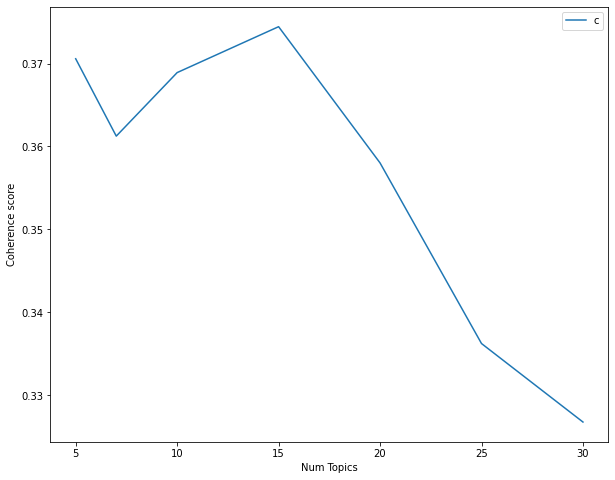

In [52]:
import matplotlib.pyplot as plt

y_res = model_results['Coherence']
x = [5,7,10,15,20,25,30]#topics_range

fig = plt.figure(figsize=(10,8))
plt.plot(x, y_res)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("c_v"), loc='best')
plt.show()

### Topic Distribution

In [187]:
total_eng_tweets = smaller_df.shape[0]
total_eng_tweets

353425

In [ ]:
topics_distribution = {}
for t in range(15):
    df_topic = smaller_df[smaller_df['topic']==t]
    num_tweets = df_topic.shape[0]
    topics_distribution[t] = num_tweets

In [190]:
topics_distribution_sorted = {k: v for k, v in sorted(topics_distribution.items(), key=lambda item: item[1], reverse=True)}
topics_distribution_sorted

{14: 73112,
 4: 60390,
 11: 40963,
 13: 34723,
 9: 28621,
 7: 16919,
 5: 16776,
 0: 16261,
 2: 14277,
 10: 13496,
 3: 11682,
 12: 8173,
 6: 7706,
 8: 7011,
 1: 3315}

In [ ]:
distribution = pd.DataFrame(data={'topic': list(topics_distribution_sorted.keys()), 
                                  'number of tweets': list(topics_distribution_sorted.values())})

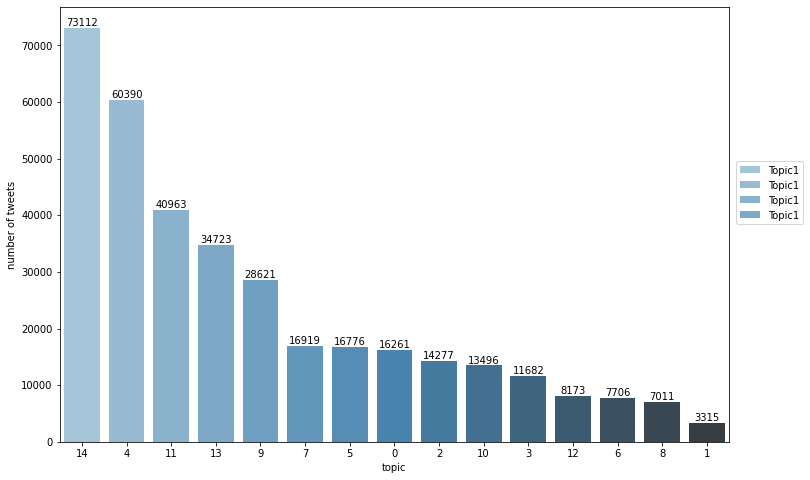

In [223]:
import seaborn as sns
fig = plt.figure(figsize=(12,8))
ax = sns.barplot(x='topic', y='number of tweets',data=distribution,palette="Blues_d", order=distribution['topic'])
ax.bar_label(ax.containers[0])
ax.legend(ax.patches, ['Topic1','Topic1','Topic1','Topic1'], loc=[1.01,0.5])